**Task 1(c): Take grayscale image of size 512x512, illustrate the histogram of the image & make single threshold segmentation observed from the histogram**

### Importing the Libraries

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Histogram Function

In [57]:
def generate_histogram(image):
    gray_levels_count = np.zeros(256)
    height, width = image.shape

    for r in range (width):
        for c in range(height):
            gray_levels_count[image[c, r]] += 1

    plt.bar(range(256), gray_levels_count, width = 1.0, color = "gray")
    plt.title("Original Image Histogram")
    plt.show()

    return gray_levels_count

### Loading the Original Image

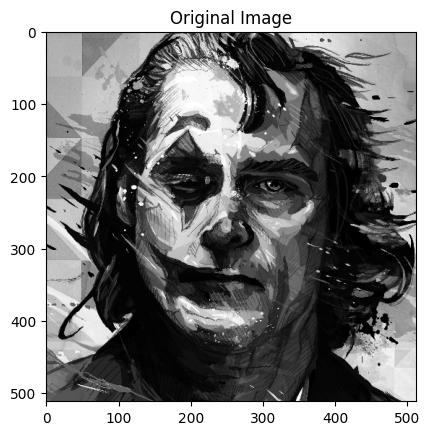

In [58]:
original_image = cv2.resize(cv2.imread("Joker.jpg", 0), (512, 512))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

### Showing Original Image Histogram

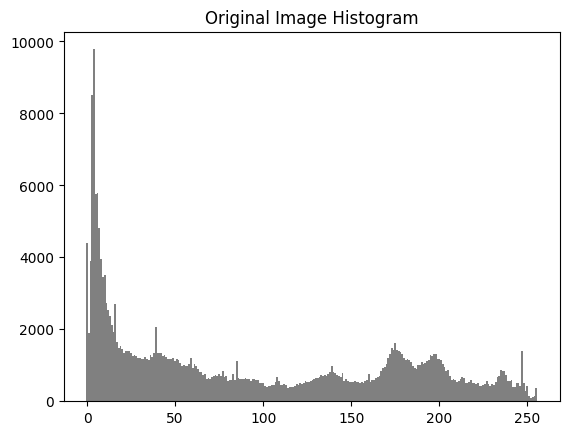

In [59]:
original_image_histogram = generate_histogram(original_image)

### Calculating Threshold observed from the Histogram

In [60]:
threshold_point = np.sum(original_image_histogram) // 2
threshold_intensity = 0

while True:
    if (threshold_point <= 0):
        break
    threshold_point -= original_image_histogram[threshold_intensity]
    threshold_intensity += 1

### Making single threshold segmentation

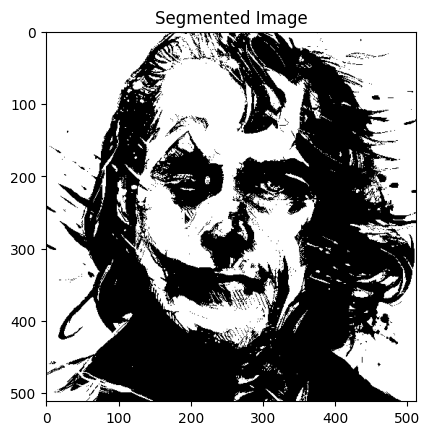

In [61]:
segmented_image = np.where(original_image > threshold_intensity, 255, 0)
segmented_image = np.uint8(segmented_image)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.show()

### Showing Segmented Image Histogram

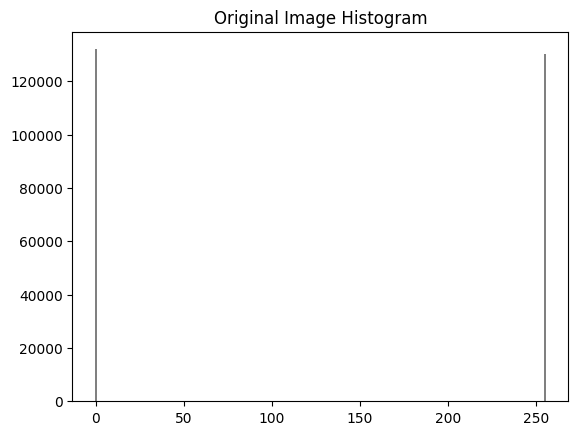

In [62]:
segmented_image_histogram = generate_histogram(segmented_image)